# Cerebellar volumetry analysis with GLM: Comparing MAGeT ans SUIT results
## Data: 
    - 1. Cerebellar SUIT segmentation; 
         - SUIT: Left/right 1-X+Dentate+Interposed+Fastigial and Vermis
    - 2. Cerebellar MAGeTBrain [MAGeTBrain pipeline](https://github.com/CobraLab/documentation/wiki/MAGeTBrain#collecting-volumes)
        - MAGeT: Left/right 1-X+WhiteMatter(CM)

## Cohorts
- Current cohort: MNI ET/NC (38/32), PPMI/ADNI NC (116/308) QC applied.

## Tasks: GLM for 
- Compare lobule volumes： 

## Covariates
- Age, Sex, intracranial volume (eTIV, infratentorium, cerebellar volume), site.

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = Path("/codes/tab_data")
maget_dir = Path("/codes/preproc/maget/results")
cohorts_str = ['ADNI','ET','NC','PPMI']
et_maget_read = pd.read_csv(maget_dir/('ET_volumes.csv'), sep=',', header=0, index_col=0)
et_maget_read.index= [x[2:10] for x in et_maget_read.index]
nc_maget_read = pd.read_csv(maget_dir/('NC_volumes.csv'), sep=',', header=0, index_col=0)
nc_maget_read.index= [x[2:10] for x in nc_maget_read.index]
adni_maget_read = pd.read_csv(maget_dir/('ADNI_volumes.csv'), sep=',', header=0, index_col=0)
ppmi_maget_read = pd.read_csv(maget_dir/('PPMI_volumes.csv'), sep=',', header=0, index_col=0)
maget_df = pd.concat([et_maget_read,nc_maget_read,ppmi_maget_read,adni_maget_read])
maget_df.index= [x.replace('-','_') for x in maget_df.index]
maget_df.loc[:,'L_I_IV']  = maget_df.loc[:,'L_I_II']+maget_df.loc[:,'L_III']+maget_df.loc[:,'L_IV']
maget_df.loc[:,'R_I_IV'] = maget_df.loc[:,'R_I_II']+maget_df.loc[:,'R_III']+maget_df.loc[:,'R_IV']

#[maget_res=maget_res+{x: pd.read_csv(maget_dir/(x+"_volumes.csv"), sep=',', header=0, index_col=0)} for x in cohorts_str]
data_all_file  = data_dir/'all_Des-cere_preped_qcInfo.csv'
data_df    = pd.read_csv(data_all_file , sep=',', header=0, index_col=0);
data_df=data_df.join(maget_df, how='left')

# apply QC
# Applying QC 
qc_th=2
data_df=data_df[(data_df['freesurfer_score']>=qc_th)&(data_df['suit_score']>=qc_th)&(data_df['maget_score']>=qc_th)];

211112-00:15:51,264 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.5.0


In [2]:
#GLM analysis and non-parametric comparison
SUIT_l_labels = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
end_lubule_list=len(MAGeT_l_labels)
#maget_df.columns=
#['L_I_II', 'L_III', 'L_IV', 'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X', 'L_CM', 
# 'R_I_II', 'R_III', 'R_IV', 'R_V', 'R_VI', 'R_Crus_I', 'R_Crus_II', 'R_VIIB', 'R_VIIIA', 'R_VIIIB', 'R_IX', 'R_X', 'R_CM']
# No vermis in MAGeT as well.

(64, 54)


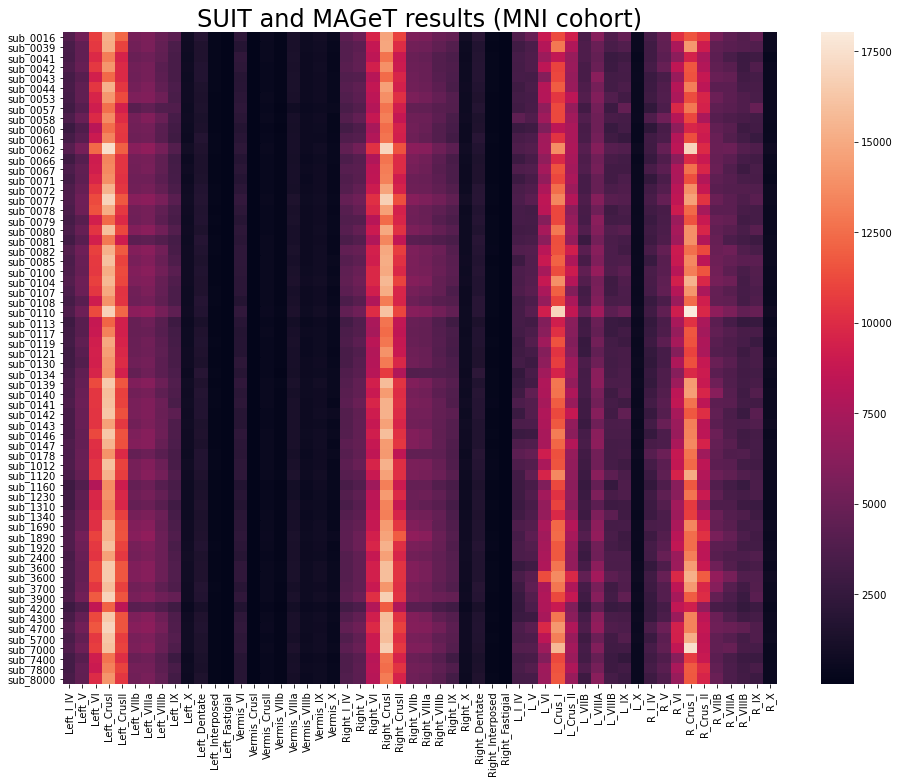

In [4]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels]
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (MNI cohort)', fontsize=24)
print(vis_df.shape)

(365, 54)


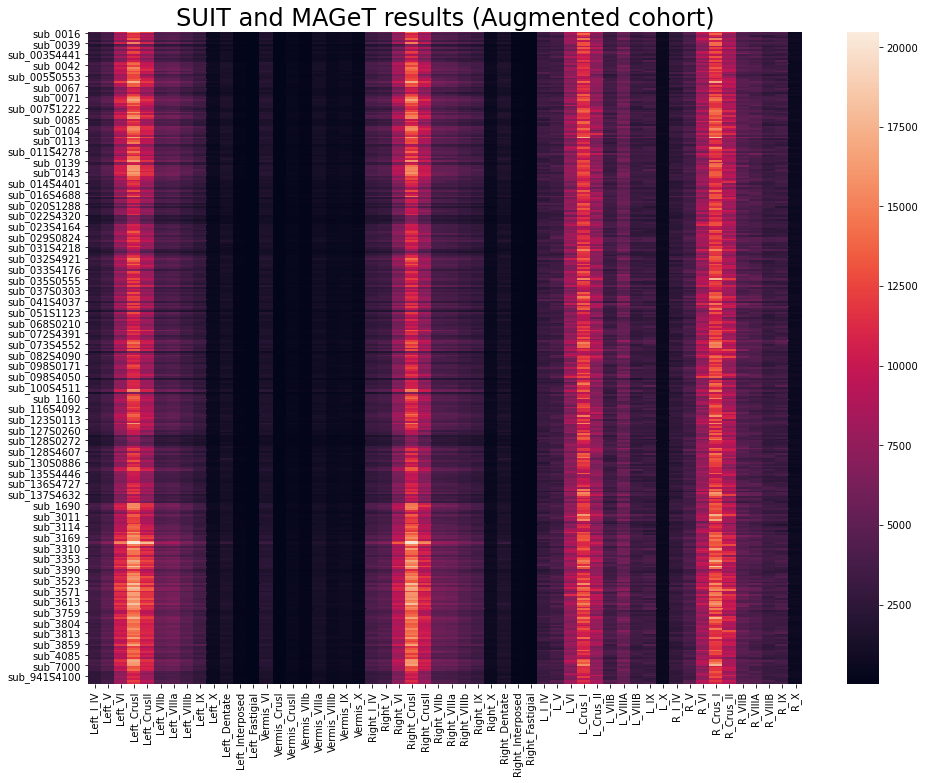

In [5]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels].copy()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (Augmented cohort)', fontsize=24)
print(vis_df.shape)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.917478,0.824901,0.734556,0.733194,0.743267,0.760820,0.741810,0.558200,0.632414,...,0.662353,0.609470,0.559159,0.602956,0.416964,0.408926,0.551086,0.513085,0.379401,0.304909
Left_V,0.917478,1.000000,0.877182,0.796420,0.738380,0.706304,0.728415,0.753680,0.639996,0.639770,...,0.579634,0.638871,0.516213,0.579508,0.377893,0.396799,0.437468,0.478286,0.419936,0.378335
Left_VI,0.824901,0.877182,1.000000,0.860926,0.757930,0.729783,0.755437,0.783861,0.692354,0.668515,...,0.325891,0.463714,0.463927,0.648896,0.339135,0.444099,0.482804,0.472375,0.421068,0.451077
Left_CrusI,0.734556,0.796420,0.860926,1.000000,0.797828,0.777224,0.785095,0.796517,0.737386,0.715293,...,0.238264,0.392982,0.417686,0.710984,0.390007,0.449197,0.429915,0.401857,0.482669,0.531182
Left_CrusII,0.733194,0.738380,0.757930,0.797828,1.000000,0.915713,0.883973,0.827335,0.675198,0.626047,...,0.283446,0.318814,0.387691,0.564909,0.669126,0.614914,0.570238,0.463282,0.466726,0.402018
Left_VIIb,0.743267,0.706304,0.729783,0.777224,0.915713,1.000000,0.975005,0.893563,0.591011,0.623619,...,0.337691,0.346041,0.302683,0.572761,0.575481,0.549573,0.603430,0.445575,0.345052,0.335575
Left_VIIIa,0.760820,0.728415,0.755437,0.785095,0.883973,0.975005,1.000000,0.924852,0.612104,0.640956,...,0.332906,0.394087,0.315098,0.583097,0.542713,0.514767,0.594062,0.465957,0.345920,0.346161
Left_VIIIb,0.741810,0.753680,0.783861,0.796517,0.827335,0.893563,0.924852,1.000000,0.666806,0.682734,...,0.346766,0.472243,0.298030,0.552772,0.454503,0.403554,0.491649,0.530115,0.394711,0.375392
Left_IX,0.558200,0.639996,0.692354,0.737386,0.675198,0.591011,0.612104,0.666806,1.000000,0.527919,...,0.095749,0.321576,0.385033,0.572499,0.536968,0.461987,0.388522,0.386605,0.801298,0.499212
Left_X,0.632414,0.639770,0.668515,0.715293,0.626047,0.623619,0.640956,0.682734,0.527919,1.000000,...,0.351954,0.490767,0.369077,0.577581,0.251403,0.194504,0.328701,0.365936,0.411434,0.563500


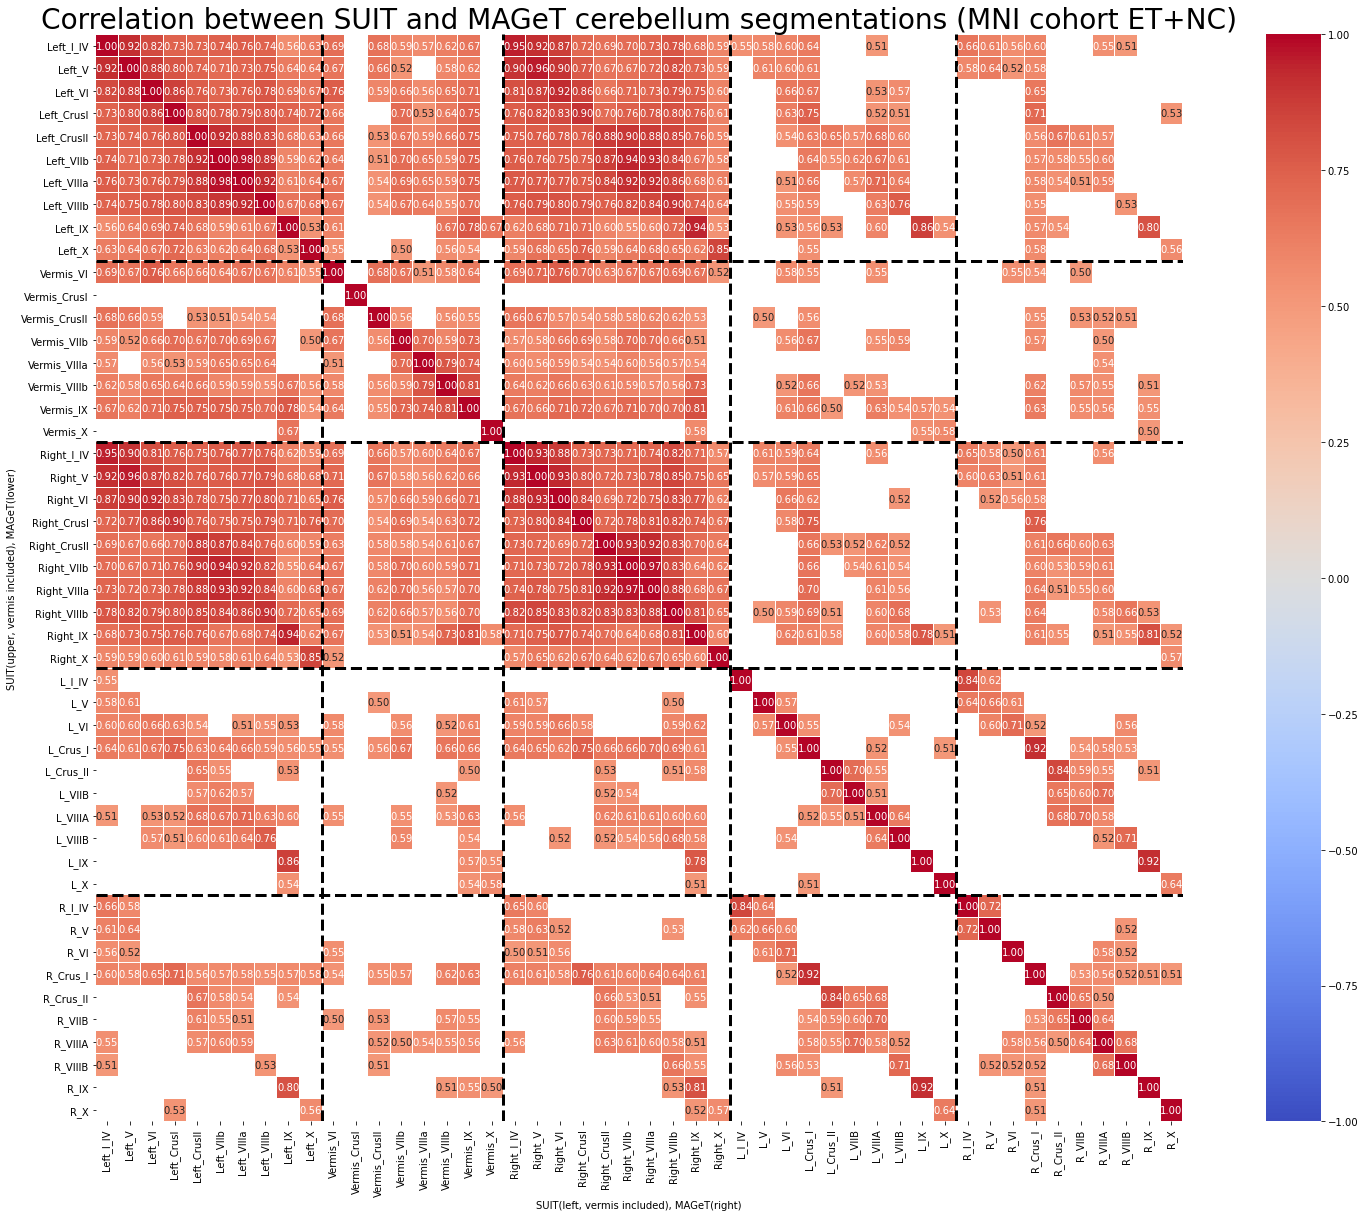

In [7]:
# Heatmap of correlation between SUIT and MAGeT measures (intercept)
C_MAP='coolwarm'; TH=0.5
vis_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(corr_>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (MNI cohort ET+NC)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.981149,0.971353,0.949882,0.948473,0.951249,0.953710,0.960938,0.929900,0.927468,...,0.542235,0.484004,0.286242,0.437617,0.411751,0.377970,0.329191,0.452331,0.426484,0.071606
Left_V,0.981149,1.000000,0.984509,0.956543,0.953789,0.953182,0.954363,0.961548,0.935072,0.934461,...,0.494843,0.497235,0.294189,0.431576,0.409170,0.376780,0.305662,0.449762,0.425100,0.092401
Left_VI,0.971353,0.984509,1.000000,0.966876,0.951368,0.954020,0.955397,0.962415,0.936042,0.936756,...,0.455867,0.442716,0.295987,0.439166,0.391427,0.377321,0.294783,0.434242,0.417490,0.090501
Left_CrusI,0.949882,0.956543,0.966876,1.000000,0.945632,0.948978,0.951564,0.954459,0.931421,0.937068,...,0.421494,0.413603,0.275490,0.513200,0.370999,0.358815,0.288406,0.419633,0.422188,0.086519
Left_CrusII,0.948473,0.953789,0.951368,0.945632,1.000000,0.988147,0.981616,0.966156,0.929867,0.934600,...,0.426797,0.415617,0.260958,0.415243,0.498779,0.455986,0.361609,0.440584,0.439078,0.097263
Left_VIIb,0.951249,0.953182,0.954020,0.948978,0.988147,1.000000,0.994867,0.976358,0.925108,0.939764,...,0.445126,0.422686,0.269641,0.417552,0.486095,0.458427,0.365601,0.442974,0.431476,0.089367
Left_VIIIa,0.953710,0.954363,0.955397,0.951564,0.981616,0.994867,1.000000,0.982915,0.931183,0.941215,...,0.448937,0.431778,0.265052,0.415988,0.474480,0.436871,0.362825,0.445192,0.432184,0.086588
Left_VIIIb,0.960938,0.961548,0.962415,0.954459,0.966156,0.976358,0.982915,1.000000,0.953133,0.945951,...,0.473847,0.460370,0.249541,0.420064,0.437083,0.404123,0.337443,0.485632,0.474467,0.070168
Left_IX,0.929900,0.935072,0.936042,0.931421,0.929867,0.925108,0.931183,0.953133,1.000000,0.919278,...,0.434663,0.440948,0.241824,0.434685,0.429082,0.372126,0.312307,0.474653,0.591552,0.093762
Left_X,0.927468,0.934461,0.936756,0.937068,0.934600,0.939764,0.941215,0.945951,0.919278,1.000000,...,0.436923,0.423763,0.256355,0.426185,0.397534,0.353101,0.277937,0.400091,0.433832,0.119525


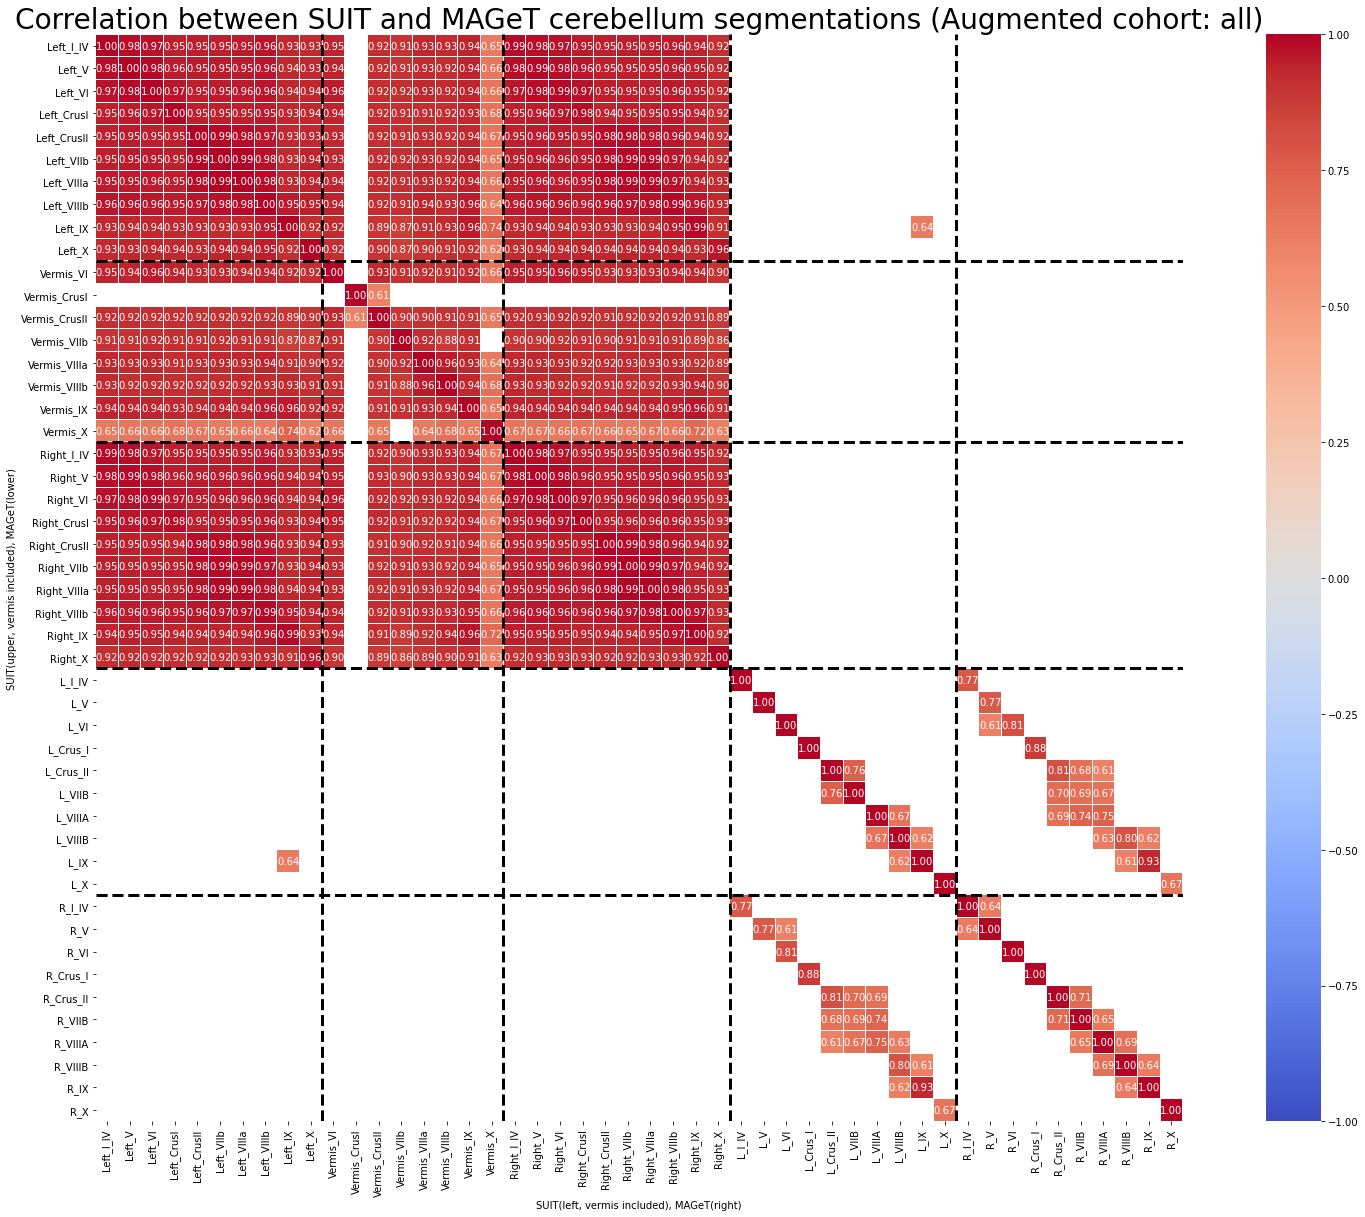

In [8]:
# Heatmap of correlation between SUIT and MAGeT measures (intercept)
C_MAP='coolwarm'; TH=0.6
vis_df=data_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels].copy()

corr_=vis_df.corr()
mask_=corr_.where(corr_>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f2, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (Augmented cohort: all)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f2.savefig("AugCohort_SUIT-MAGeT_comp.jpg")
display(corr_)

In [9]:
# GLM analysis for MNI cohort
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
import statsmodels.stats as sts
from utils_et_biomarker.utils import glm_test, rep_model

alpha_=0.05

tmp_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
tar_list_suit = ['Left_CrusI', 'Left_CrusII', 'Right_CrusI','Right_CrusII']
tar_list_maget = ['L_Crus_I', 'L_Crus_II', 'R_Crus_I', 'R_Crus_II']


# Using eTIV as covariate before QC
covariate_model_str = '~age+C(sex, Treatment(reference="F") )+eTIV+C(group, Treatment(reference="NC"))';
covariate_dict_suit = glm_test(tmp_df, tar_list_suit, covariate_model_str);
print('SUIT @MNI Cohort:')
#rep_model(covariate_dict,{'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
rep_model(covariate_dict_suit, {'name':'all'});

#
print('MAGeT @Augmented Cohort:')
covariate_dict_maget = glm_test(tmp_df, tar_list_maget, covariate_model_str);
#rep_model(covariate_dict,{'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
rep_model(covariate_dict_maget, {'name':'all'});


SUIT @MNI Cohort:
Display all results:



Left_CrusI~age+C(sex, Treatment(reference="F") )+eTIV+C(group, Treatment(reference="NC")) 

                               Results: Generalized linear model
Model:                        GLM                        AIC:                      1075.3272    
Link Function:                identity                   BIC:                      63511969.6409
Dependent Variable:           Left_CrusI                 Log-Likelihood:           -532.66      
Date:                         2021-11-12 00:24           LL-Null:                  -560.47      
No. Observations:             64                         Deviance:                 6.3512e+07   
Df Model:                     4                          Pearson chi2:             6.35e+07     
Df Residuals:                 59                         Scale:                    1.0765e+06   
Method:                       IRLS                                                              
-------------------------

In [10]:
#GLM for the augmented group
tmp_df=data_df.copy()

tmp_df.loc[:,'is_mni'] =[1 if int(x=='ET' or x=='NC') else 0 for x in tmp_df['group']]
tmp_df.loc[:,'is_ppmi']=[int(x=='PPMI') for x in tmp_df['group']]
tmp_df.loc[:,'is_adni']=[int(x=='ADNI') for x in tmp_df['group']]
tmp_df.loc[:,'group']  =[x if x=='ET' else 'NC' for x in tmp_df['group']]

tar_list_suit = ['Left_CrusI', 'Left_CrusII', 'Right_CrusI','Right_CrusII']
tar_list_maget = ['L_Crus_I', 'L_Crus_II', 'R_Crus_I', 'R_Crus_II']

# Test for SUIT results
covariate_model_all_str = '~age+C(sex, Treatment(reference="F"))+eTIV+C(is_mni)+C(is_adni)+C(is_ppmi)+C(group, Treatment(reference="NC"))';
covariate_dict_suit = glm_test(tmp_df, tar_list_suit, covariate_model_all_str);
print('SUIT @MNI Cohort:')
#rep_model(covariate_dict,{'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
rep_model(covariate_dict_suit, {'name':'all'});

# Test for MAGeT results:
print('MAGeT @Augmented Cohort:')
covariate_dict_maget = glm_test(tmp_df, tar_list_maget, covariate_model_all_str);
#rep_model(covariate_dict,{'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
rep_model(covariate_dict_maget, {'name':'all'});

SUIT @MNI Cohort:
Display all results:



Left_CrusI~age+C(sex, Treatment(reference="F"))+eTIV+C(is_mni)+C(is_adni)+C(is_ppmi)+C(group, Treatment(reference="NC")) 

                               Results: Generalized linear model
Model:                        GLM                       AIC:                     6436.2165     
Link Function:                identity                  BIC:                     936005267.6293
Dependent Variable:           Left_CrusI                Log-Likelihood:          -3211.1       
Date:                         2021-11-12 00:26          LL-Null:                 -3512.9       
No. Observations:             365                       Deviance:                9.3601e+08    
Df Model:                     6                         Pearson chi2:            9.36e+08      
Df Residuals:                 358                       Scale:                   2.6145e+06    
Method:                       IRLS                                                             
--

In [ ]:
# permutation test
